# This notebook will explore the Scikit-learn python package
[Scikit-learn Website](https://scikit-learn.org/stable/index.html)

### Classification Analysis using Scikit-Learn
What is classification?
From [here](https://machinelearningmastery.com/types-of-classification-in-machine-learning/#:~:text=In%20machine%20learning%2C%20classification%20refers,it%20is%20spam%20or%20not.), classification refers to a predictive modeling method used in machine learning where a class label is predicted for a given example of input data.<br>In order to train the algorithm in classification, a dataset with lots of examples of inputs and outputs is required.
<br>The algorithm will make use of the training dataset to construct a suitable connection between input data and specific class labels. The training dataset must accurately represent the problem and have many examples of each class.

### Red Wine Quality
This classification analysis will be performed on red wine quality using a dataset from the [UCI machine learning repository](https://archive.ics.uci.edu/ml/datasets/wine+quality). <br>
The dataset relates to the red variant the Portugese "Vinho Verde" wine. 
* Input Variables
1. fixed acidity
2. volatile acidity
3. citric acid
4. residual sugar
5. chlorides
6. free sulfur dioxide
7. total sulfur dioxide
8. density
9. pH
10. sulphates
11. alcohol
Output variable (based on sensory data):
12. quality (score between 0 and 10)


In [1]:
# import libraries
import numpy as np
import pandas as pd
# libraries for plotting
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
plt.rcParams["figure.figsize"] = (16,8)

In [2]:
# read in the dataset
df_wine = pd.read_csv("winequality-red.csv", sep=";")

In [3]:
# View the shape of the dataset
print(f"Rows, columns {df_wine.shape}")
# View the top 5 rows of the dataset
df_wine.head()

Rows, columns (1599, 12)


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


The dataset contains 1599 rows and 12 columns

In [4]:
# print a summary of the dataset using pd.info
df_wine.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


All the input values (0-11) are of type float64 with the output (quality) of type int64

In [5]:
# View descriptive statistics of the dataset using describe()
df_wine.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


From the table above, the output attribute quality has a minimum of 3 and a maximum of 8 this is good to know for future.

In [6]:
# the dataset looks very clean. 
df_wine.isna().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

There are no missing values

In [7]:
# check the unique values of the attribute "quality"
df_wine["quality"].unique()

array([5, 6, 7, 4, 8, 3])

In [8]:
# next check how the data is distributed across these values
df_wine.quality.value_counts().sort_index()

3     10
4     53
5    681
6    638
7    199
8     18
Name: quality, dtype: int64

## Exploring the data

<AxesSubplot:xlabel='quality', ylabel='count'>

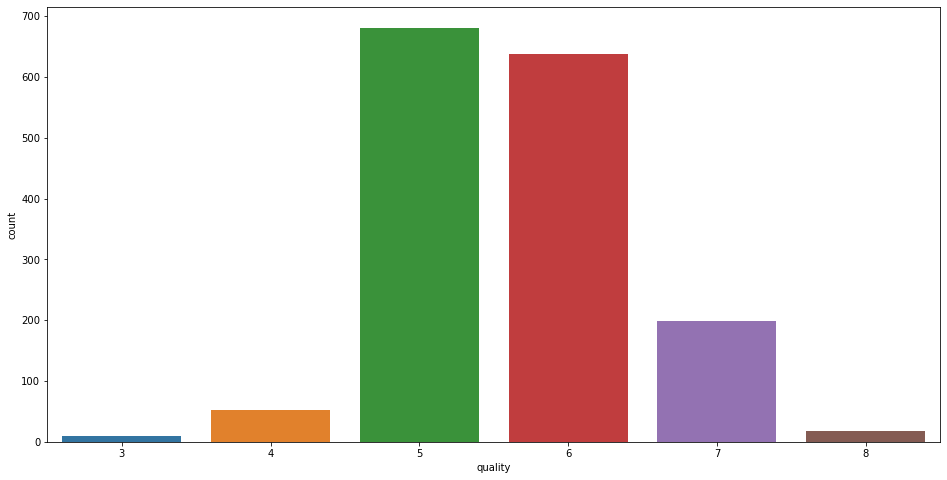

In [9]:
# plot the output variable "quality"\
sns.countplot(data=df_wine, x="quality", )

The above distribution confirms the previous observation that the range for output variable is between 3 and 8.

<AxesSubplot:>

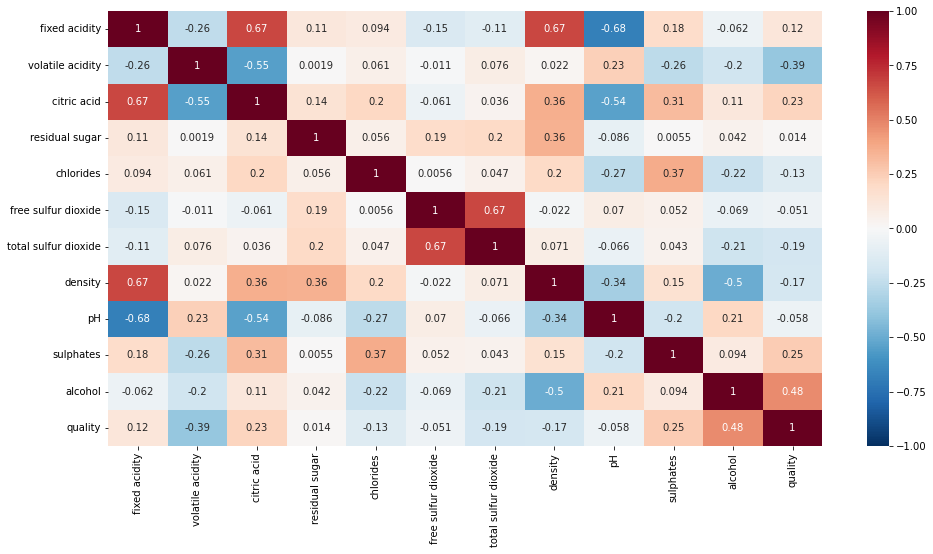

In [10]:
# plot the correlation of each variable to "quality"
correlation = df_wine.corr()
sns.heatmap(correlation, annot=True, linewidths=0, vmin=-1, cmap="RdBu_r")

In [11]:
correlation['quality'].sort_values(ascending=False)

quality                 1.000000
alcohol                 0.476166
sulphates               0.251397
citric acid             0.226373
fixed acidity           0.124052
residual sugar          0.013732
free sulfur dioxide    -0.050656
pH                     -0.057731
chlorides              -0.128907
density                -0.174919
total sulfur dioxide   -0.185100
volatile acidity       -0.390558
Name: quality, dtype: float64

* The variables which affect the output quality of wine in order of highest correlation are *alcohol, sulphates, citric acid, fixed acidity*. These are the variables that will be explored more in depth.
* The rest of the variables have neglible or negative correlation.

### Classification
As this is a classification example using scikit-learn, a new discreet response variable 'rating' will be created from the quality variable. This will be calculated as follows.
<br> bad = 1-4
<br> average = 5-6
<br> good = 7-10

In [26]:
# the conditions can be set using np.select() https://numpy.org/doc/stable/reference/generated/numpy.select.html
rating_conditions = [
    (df_wine['quality'] >= 7),
    (df_wine['quality'] <= 4)
]
rating = ['good', 'bad']
df_wine['rating'] = np.select(rating_conditions, rating, default='average')
df_wine.rating.value_counts()

average    1319
good        217
bad          63
Name: rating, dtype: int64

***
### Exploring a machine learning tutorial

[Hosted here](https://www.dataquest.io/blog/sci-kit-learn-tutorial/)
This tutorial explores the sales_win_loss data set from IBM's Watson repository

In [12]:
# Matplotlib magic command for plotting
%matplotlib inline 

#import pandas package to explore the data 
import pandas as pd


In [13]:
# Load the data using pandas.read_csv()
sales_data = pd.read_csv("https://raw.githubusercontent.com/vkrit/data-science-class/master/WA_Fn-UseC_-Sales-Win-Loss.csv")

<br>**Review the data using head function**

In [14]:
# View the first few records of the data set
sales_data.head()

,Opportunity Number,Supplies Subgroup,Supplies Group,Region,Route To Market,Elapsed Days In Sales Stage,Opportunity Result,Sales Stage Change Count,Total Days Identified Through Closing,Total Days Identified Through Qualified,Opportunity Amount USD,Client Size By Revenue,Client Size By Employee Count,Revenue From Client Past Two Years,Competitor Type,Ratio Days Identified To Total Days,Ratio Days Validated To Total Days,Ratio Days Qualified To Total Days,Deal Size Category
0,1641984,Exterior Accessories,Car Accessories,Northwest,Fields Sales,76,Won,13,104,101,0,5,5,0,Unknown,0.69636,0.113985,0.154215,1
1,1658010,Exterior Accessories,Car Accessories,Pacific,Reseller,63,Loss,2,163,163,0,3,5,0,Unknown,0.00000,1.000000,0.000000,1
2,1674737,Motorcycle Parts,Performance & Non-auto,Pacific,Reseller,24,Won,7,82,82,7750,1,1,0,Unknown,1.00000,0.000000,0.000000,1
3,1675224,Shelters & RV,Performance & Non-auto,Midwest,Reseller,16,Loss,5,124,124,0,1,1,0,Known,1.00000,0.000000,0.000000,1
4,1689785,Exterior Accessories,Car Accessories,Pacific,Reseller,69,Loss,11,91,13,69756,1,1,0,Unknown,0.00000,0.141125,0.000000,4


In [15]:
# View the last few rows from the dataframe using .tail() function
sales_data.tail()

,Opportunity Number,Supplies Subgroup,Supplies Group,Region,Route To Market,Elapsed Days In Sales Stage,Opportunity Result,Sales Stage Change Count,Total Days Identified Through Closing,Total Days Identified Through Qualified,Opportunity Amount USD,Client Size By Revenue,Client Size By Employee Count,Revenue From Client Past Two Years,Competitor Type,Ratio Days Identified To Total Days,Ratio Days Validated To Total Days,Ratio Days Qualified To Total Days,Deal Size Category
78020,10089932,Batteries & Accessories,Car Accessories,Southeast,Reseller,0,Loss,2,0,0,250000,1,1,3,Unknown,0.0,0.0,0.0,6
78021,10089961,Shelters & RV,Performance & Non-auto,Northeast,Reseller,0,Won,1,0,0,180000,1,1,0,Unknown,0.0,0.0,0.0,5
78022,10090145,Exterior Accessories,Car Accessories,Southeast,Reseller,0,Loss,2,0,0,90000,1,1,0,Unknown,0.0,0.0,0.0,4
78023,10090430,Exterior Accessories,Car Accessories,Southeast,Fields Sales,0,Loss,2,0,0,120000,1,1,0,Unknown,1.0,0.0,0.0,5
78024,10094255,Interior Accessories,Car Accessories,Mid-Atlantic,Reseller,0,Loss,1,0,0,90000,1,1,0,Unknown,0.0,0.0,0.0,4


<br>**View the various data types of the data set using pd.dtypes(). This could come in handy at a later stage if data needs to be manipulated or converted**

In [16]:
sales_data.dtypes

Opportunity Number                           int64
Supplies Subgroup                           object
Supplies Group                              object
Region                                      object
Route To Market                             object
Elapsed Days In Sales Stage                  int64
Opportunity Result                          object
Sales Stage Change Count                     int64
Total Days Identified Through Closing        int64
Total Days Identified Through Qualified      int64
Opportunity Amount USD                       int64
Client Size By Revenue                       int64
Client Size By Employee Count                int64
Revenue From Client Past Two Years           int64
Competitor Type                             object
Ratio Days Identified To Total Days        float64
Ratio Days Validated To Total Days         float64
Ratio Days Qualified To Total Days         float64
Deal Size Category                           int64
dtype: object

## Visualising the Data
Seaborn is an excellent package to use for plotting data. This must be imported along with Matplotlib.

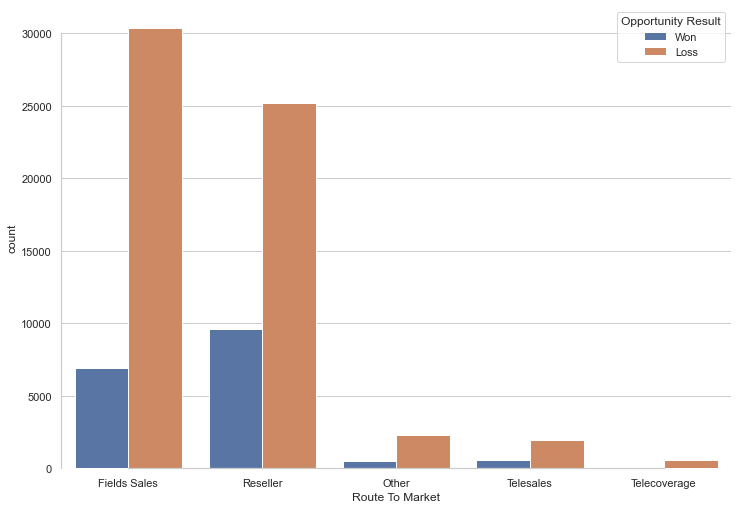

In [17]:
# import seaborn for plotting
import seaborn as sns

# import matplotlib for plotting
import matplotlib.pyplot as plt

# setting the plot size and backgroud to white for all plots
# sns.set updated to sns.set_theme https://seaborn.pydata.org/generated/seaborn.set.html
sns.set_theme(style='whitegrid', rc={'figure.figsize':(12,8.5)})

# create a countplot
sns.countplot(x="Route To Market", data=sales_data, hue ="Opportunity Result")

# Remove the top and down margin
sns.despine(trim=True)

# display the plot
plt.show()

## Preprocessing Data
Before building prediction models using scikit-learn some of the data must be processed from string values into numerical values as this is how scikit-learn operates best. Scikit-learn offers a method LabelEncoder() which converts string data into numerical data which will be used here.
<br><br>First let's take a look at some of the string values contained in the columns

In [18]:
print("Supplies Subgroup' : ",sales_data['Supplies Subgroup'].unique())
print("Region : ",sales_data['Region'].unique())
print("Route To Market : ",sales_data['Route To Market'].unique())
print("Opportunity Result : ",sales_data['Opportunity Result'].unique())
print("Competitor Type : ",sales_data['Competitor Type'].unique())
print("'Supplies Group : ",sales_data['Supplies Group'].unique())

Supplies Subgroup' :  ['Exterior Accessories' 'Motorcycle Parts' 'Shelters & RV'
 'Garage & Car Care' 'Batteries & Accessories' 'Performance Parts'
 'Towing & Hitches' 'Replacement Parts' 'Tires & Wheels'
 'Interior Accessories' 'Car Electronics']
Region :  ['Northwest' 'Pacific' 'Midwest' 'Southwest' 'Mid-Atlantic' 'Northeast'
 'Southeast']
Route To Market :  ['Fields Sales' 'Reseller' 'Other' 'Telesales' 'Telecoverage']
Opportunity Result :  ['Won' 'Loss']
Competitor Type :  ['Unknown' 'Known' 'None']
'Supplies Group :  ['Car Accessories' 'Performance & Non-auto' 'Tires & Wheels'
 'Car Electronics']


<br>The unique values for for the different categorical columns have been identified above. Next step is to encode these as numbers using the following code

In [19]:
#import the preprocessing module from sklean
from sklearn import preprocessing

# create the Labelencoder() object
le = preprocessing.LabelEncoder()

#convert the categorical columns into numeric
sales_data['Supplies Subgroup'] = le.fit_transform(sales_data['Supplies Subgroup'])
sales_data['Region'] = le.fit_transform(sales_data['Region'])
sales_data['Route To Market'] = le.fit_transform(sales_data['Route To Market'])
sales_data['Opportunity Result'] = le.fit_transform(sales_data['Opportunity Result'])
sales_data['Competitor Type'] = le.fit_transform(sales_data['Competitor Type'])
sales_data['Supplies Group'] = le.fit_transform(sales_data['Supplies Group'])

#display the initial records
sales_data.head()

,Opportunity Number,Supplies Subgroup,Supplies Group,Region,Route To Market,Elapsed Days In Sales Stage,Opportunity Result,Sales Stage Change Count,Total Days Identified Through Closing,Total Days Identified Through Qualified,Opportunity Amount USD,Client Size By Revenue,Client Size By Employee Count,Revenue From Client Past Two Years,Competitor Type,Ratio Days Identified To Total Days,Ratio Days Validated To Total Days,Ratio Days Qualified To Total Days,Deal Size Category
0,1641984,2,0,3,0,76,1,13,104,101,0,5,5,0,2,0.69636,0.113985,0.154215,1
1,1658010,2,0,4,2,63,0,2,163,163,0,3,5,0,2,0.00000,1.000000,0.000000,1
2,1674737,5,2,4,2,24,1,7,82,82,7750,1,1,0,2,1.00000,0.000000,0.000000,1
3,1675224,8,2,1,2,16,0,5,124,124,0,1,1,0,0,1.00000,0.000000,0.000000,1
4,1689785,2,0,4,2,69,0,11,91,13,69756,1,1,0,2,0.00000,0.141125,0.000000,4


Now that the data is prepared and converted it is almost ready to be used for building the predictive model. The final critical step is 
### Training Set & Test Set
The algorithm must be trained on a set of data so it can learn the specific relationships in the data. For this the data set will be split in two 

In [20]:
# select columns other than 'Opportunity Number','Opportunity Result'
cols = [col for col in sales_data.columns if col not in ['Opportunity Number','Opportunity Result']]
# dropping the 'Opportunity Number'and 'Opportunity Result' columns
data = sales_data[cols]
#assigning the Oppurtunity Result column as target
target = sales_data['Opportunity Result']
data.head(n=2)

,Supplies Subgroup,Supplies Group,Region,Route To Market,Elapsed Days In Sales Stage,Sales Stage Change Count,Total Days Identified Through Closing,Total Days Identified Through Qualified,Opportunity Amount USD,Client Size By Revenue,Client Size By Employee Count,Revenue From Client Past Two Years,Competitor Type,Ratio Days Identified To Total Days,Ratio Days Validated To Total Days,Ratio Days Qualified To Total Days,Deal Size Category
0,2,0,3,0,76,13,104,101,0,5,5,0,2,0.69636,0.113985,0.154215,1
1,2,0,4,2,63,2,163,163,0,3,5,0,2,0.00000,1.000000,0.000000,1


The above code removed the Opportunity Number as this was just a unique identifier for each opportunity. Opportunity result is what we want to predict so this was also removed from the data set.  
<br>
Next it's time to train and test the dataset

In [21]:
#import the necessary module
from sklearn.model_selection import train_test_split
#split data set into train and test sets
data_train, data_test, target_train, target_test = train_test_split(data,target, test_size = 0.30, random_state = 10)

### Naive-Bayes
On a very high level a Naive-Bayes algorithm calculates the probability of the connection of a feature with a target variable and then it selects the feature with the highest probability.

In [22]:
# import the necessary module
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score
#create an object of the type GaussianNB
gnb = GaussianNB()
#train the algorithm on training data and predict using the testing data
pred = gnb.fit(data_train, target_train).predict(data_test)
#print(pred.tolist())
#print the accuracy score of the model
print("Naive-Bayes accuracy : ",accuracy_score(target_test, pred, normalize = True))

Naive-Bayes accuracy :  0.7590567327409433


### Linear SVC
On a very basic level LinearSVC tries to divide the data into different planes so that it can find a best possible grouping of different classes.

In [23]:
#import the necessary modules
from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score
#create an object of type LinearSVC
svc_model = LinearSVC(random_state=0)
#train the algorithm on training data and predict using the testing data
pred = svc_model.fit(data_train, target_train).predict(data_test)
#print the accuracy score of the model
print("LinearSVC accuracy : ",accuracy_score(target_test, pred, normalize = True))

LinearSVC accuracy :  0.7762303485987696


/Users/killianfoley/opt/anaconda3/lib/python3.8/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


### K-Neighbors Classifier
Explanation to follow [Wiki K-nearest neighbors](https://en.wikipedia.org/wiki/K-nearest_neighbors_algorithm)

In [24]:
#import necessary modules
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
#create object of the lassifier
neigh = KNeighborsClassifier(n_neighbors=3)
#Train the algorithm
neigh.fit(data_train, target_train)
# predict the response
pred = neigh.predict(data_test)
# evaluate accuracy
print ("KNeighbors accuracy score : ",accuracy_score(target_test, pred))

KNeighbors accuracy score :  0.8147641831852358
